1. Uploading of the Clinical Notes Dataset in Colab and Using pd to convert it into dataframe structure

In [ ]:
from google.colab import files

In [ ]:
from IPython.display import Image

In [ ]:
# Run the below code to upload the image, Methodology with NLK.jpg, for the Clinical Text Processing Methodology with NLP

In [ ]:
logo = files.upload() #Remember to click on "Choose Files" to upload the image

Saving Week 7-Methodology1 with NLK.jpg to Week 7-Methodology1 with NLK (1).jpg


In [ ]:
# Just as shown above, copy and paste that same name of the image, Methodology with NLK.jpg, as an argument in the below code

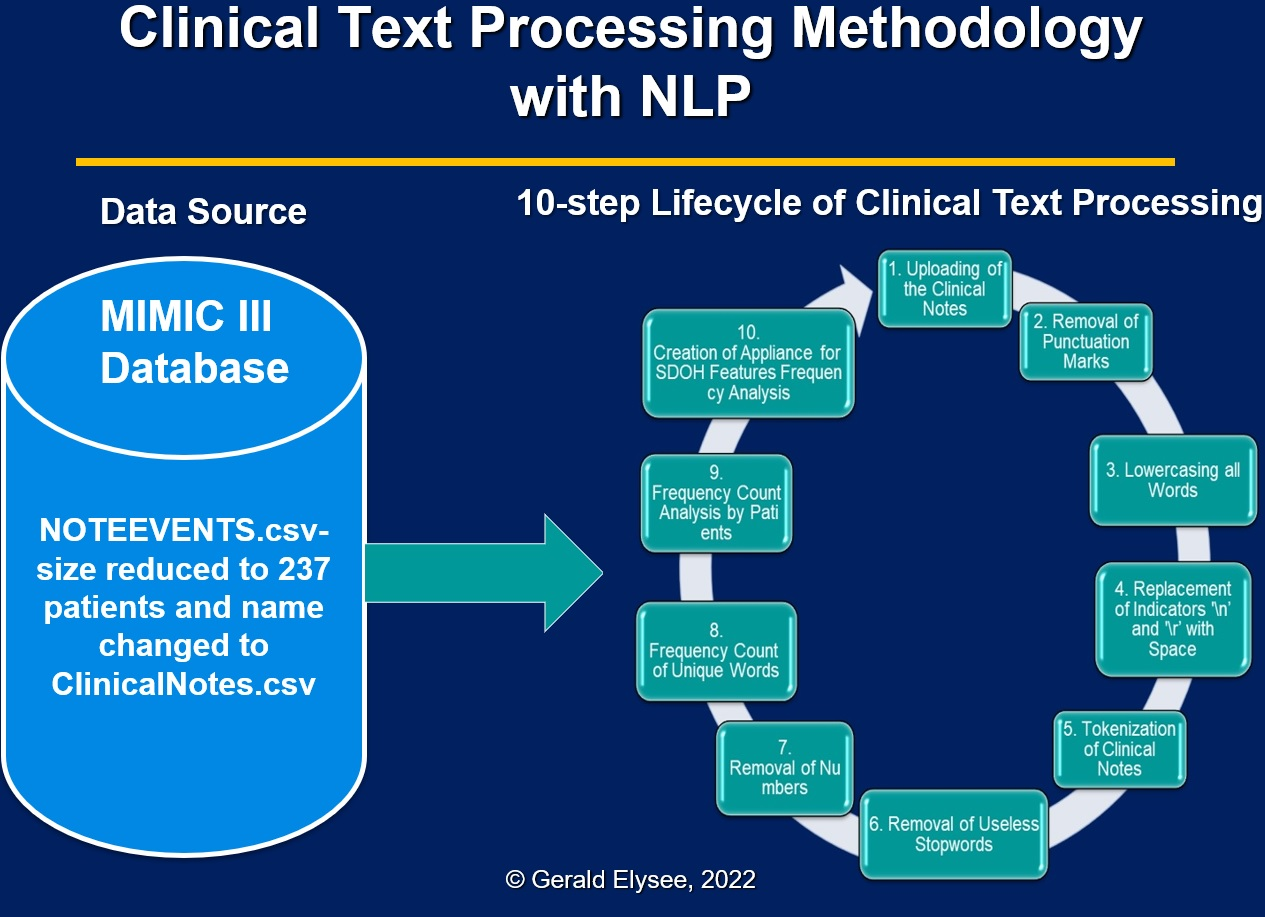

In [ ]:
Image ('Week 7-Methodology1 with NLK.jpg', width = 1000)

In [ ]:
# The above image shows the methodology we are going to use includes the data source from the MIMIC III database that's been changed to ClinicalNotes.csv
# We'll use it to perform the 10 steps of this project lifecycle
# Next, upload the ClinicalNotes.csv dataset into the Colab environment

In [ ]:
# Run the code below to upload the Clinical Notes Dataset into Colab

In [ ]:
data_file = files.upload()

Saving Week 7-ClinicalNotes.csv to Week 7-ClinicalNotes.csv


In [ ]:
# Import the below library to convert uploaded data into the data frame structure to facilitate data preparation, transformation, and analysis

In [ ]:
import pandas as pd

In [ ]:
# Run the below code to ask pandas to read the uploaded Clinical Notes Dataset
#Only use the 'TEXT' column into the data frame and put it in new memory, named "cnotes"

In [ ]:
cnotes = pd.read_csv('Week 7-ClinicalNotes.csv', usecols=['TEXT']) #this code only allows the 'TEXT' column

In [ ]:
#Run the code below to see the shape of the cnotes data frame
cnotes.shape #This gives you the number of rows/cases/patients and the number of columns in the data frame

(327, 1)

In [ ]:
# The above result reveals that cnotes data frame has 327 cases or patients and 1 column: TEXT

In [ ]:
# Run the code below to enlarge the display of column so that you can see more of the result
pd.set_option('display.max_colwidth', None) #You can replace "None" with "500" to display only 500 characters for each patient

In [ ]:
# Run the code below to display the first 5 rows of the dataset (the first five patients)
cnotes.head()

TEXT
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# 'TEXT' column displayed above contains the clinical notes that we'll need to clean
# What's wrong with the clinical notes in the 'TEXT' column? Why do they need to be cleaned?
# It's part of preparing the data for the frequency analysis we'll conduct later
# Follow below steps to clean the Clinical Notes, starting with removing the punctuation marks

2. Removal of punctuation marks from the cnotes data frame

In [ ]:
# Import punctuation library and module

In [ ]:
import string
from string import punctuation

In [ ]:
# Remove punctuation marks using the below defined function
# The 'for' loop allows the statement to iterate or loop through all the items in the column
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in punctuation])
    return punctuationfree

In [ ]:
# Apply the "remove_punctuation" function on the 'TEXT' column
#Then, add a new column, 'punctuationfree_text' to put the new data in

In [ ]:
cnotes['punctuationfree_text'] = cnotes['TEXT'].apply(lambda x: remove_punctuation(x))

In [ ]:
cnotes['punctuationfree_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Scroll to the right to see the above results show punctuations removed

In [ ]:
# Run the code below to display the names on the columns in cnotes
#Data types
cnotes.dtypes

TEXT                    object
punctuationfree_text    object
dtype: object

In [ ]:
# The code above shows that the data frame has 2 columns

**3**. Lowercasing all Words in the Clinical Notes stored in newly created 'punctuationfree_text' column

In [ ]:
# Apply the lambda code on the cnotes ['punctuationfree_text'] column to lowercase all words
# then, add a new column named cnotes['lower_text'], to put the new data in
cnotes['lower_text'] = cnotes['punctuationfree_text'].apply(lambda x: x.lower())
cnotes['lower_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# The above cnotes['lower_text'] has all lower case words
# '\n' represents new lines and '\r' represents carriage returns, we'll replace them with a space ''

In [ ]:
#Data types
cnotes.dtypes

TEXT                    object
punctuationfree_text    object
lower_text              object
dtype: object

In [ ]:
# The above code shows the cnotes data frame has 3 columns now: TEXT, punctuationfree_text, lower_text

4. Replacement of New lines indicators '\n' and carriage returns '\r' with space ' '

In [ ]:
# Apply the lambda replace code on ['lower_text'] column
# Replace the new line indicators shown as '\n' with space ' '
# Then, add a new column named, cnotes['replacedlines_text'] to put the new data in

In [ ]:
cnotes['replacedlines_text'] = cnotes['lower_text'].apply(lambda x: x.replace('\n', ' '))
cnotes['replacedlines_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Replace carriage returns indicator shown as '\r' with space ' '
# Then, add a new column named, cnotes['nocarriagereturn_text'] to put the new data in with no '\r' indicators

In [ ]:
cnotes['nocarriagereturn_text'] = cnotes['replacedlines_text'].apply(lambda x: x.replace('\r', ' '))
cnotes['nocarriagereturn_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

5. Tokenization of Clinical Notes in newly added cnotes['nocarriagereturn_text'] Column

In [ ]:
# Import word tokenizer
import nltk #Natural Language Toolkit (contains a series algorithm for NLP)
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
cnotes['tokenized_text'] = cnotes['nocarriagereturn_text'].apply(word_tokenize)
cnotes['tokenized_text']

0                                                        [admission, date, 2151716, discharge, date, 215184, service, addendum, radiologic, studies, radiologic, studies, also, included, a, chest, ct, which, confirmed, cavitary, lesions, in, the, left, lung, apex, consistent, with, infectious, processtuberculosis, this, also, moderatesized, left, pleural, effusion, head, ct, head, ct, showed, no, intracranial, hemorrhage, or, mass, effect, but, old, infarction, consistent, with, past, medical, history, abdominal, ct, abdominal, ct, showed, lesions, of, t10, and, sacrum, most, likely, secondary, to, osteoporosis, these, can, be, followed, by, repeat, imaging, as, an, outpatient, first, name8, namepattern2, first, name4, namepattern1, 1775, last, name, namepattern1, md, md, number1, 1776, dictated, byhospital, 1807, medquist36, d, 215185, ...]
1                                                                                                                                                  

In [ ]:
# The above result shows a tokenized list of words for each row/patient in the dataset
# Tokenization means splitting the clinical notes into words

6. Removal of Stopwords from the Tokenized text

In [ ]:
# Remove stopwords that are meaningless which don't add value to the NLP
# Import Natural Language Toolkit (nltk)
import nltk

In [ ]:
# Library contains stopwords for the English language like other, should, can, aren't
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:50] #Display 50 meaningless words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be']

In [ ]:
# Create the function below to remove stopwords
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

In [ ]:
# Apply the remove_stopwords function on the 'tokenized_text' column
#Then, add a new column named cnotes['no_stopwords_text'] to put the new data in
cnotes['no_stopwords_text'] = cnotes['tokenized_text'].apply(lambda x: remove_stopwords(x))
cnotes['no_stopwords_text']

0                                                                                                                                                                                                 [admission, date, 2151716, discharge, date, 215184, service, addendum, radiologic, studies, radiologic, studies, also, included, chest, ct, confirmed, cavitary, lesions, left, lung, apex, consistent, infectious, processtuberculosis, also, moderatesized, left, pleural, effusion, head, ct, head, ct, showed, intracranial, hemorrhage, mass, effect, old, infarction, consistent, past, medical, history, abdominal, ct, abdominal, ct, showed, lesions, t10, sacrum, likely, secondary, osteoporosis, followed, repeat, imaging, outpatient, first, name8, namepattern2, first, name4, namepattern1, 1775, last, name, namepattern1, md, md, number1, 1776, dictated, byhospital, 1807, medquist36, 215185, 1211, 215185, 1221, job, job, number, 1808]
1                                                                      

7. Removal of number from Clinical Notes

In [ ]:
import string

In [ ]:
#Use the below code to remove the numbers from cnotes['no_stopwords_text']
# Then, add a new column named cnotes['cleaned_text'] to put the new data in

In [ ]:
cnotes['cleaned_text'] = cnotes['no_stopwords_text'].apply(lambda list_data: [x for x in list_data if x.isalpha()])
cnotes['cleaned_text']

0                                                                                                                                                                                                                                                                                                                                                                                                  [admission, date, discharge, date, service, addendum, radiologic, studies, radiologic, studies, also, included, chest, ct, confirmed, cavitary, lesions, left, lung, apex, consistent, infectious, processtuberculosis, also, moderatesized, left, pleural, effusion, head, ct, head, ct, showed, intracranial, hemorrhage, mass, effect, old, infarction, consistent, past, medical, history, abdominal, ct, abdominal, ct, showed, lesions, sacrum, likely, secondary, osteoporosis, followed, repeat, imaging, outpatient, first, first, last, name, md, md, dictated, byhospital, job, job, number]
1                            

In [ ]:
# The clinical notes have been cleaned and are ready for Frequency Analysis
# With CountVectorization or term Frequency - Inverse Document Frequency (TF -IDF) with scikit-learn

8. Frequency count of unique words with Pandas value_counts() function from the Counter Module

In [ ]:
import pandas as pd
from collections import Counter

In [ ]:
count = cnotes ['cleaned_text'].explode().value_counts()

In [ ]:
print(count)

cleaned_text
mg                 3842
patient            3458
po                 3227
tablet             3131
blood              2684
                   ... 
infetion              1
shivering             1
hallway               1
hypersensitivty       1
chloroseptic          1
Name: count, Length: 13887, dtype: int64


In [ ]:
pd.set_option('display.max_rows', 10)
#Run this code to display all, pd.set_option("display.max_rows", None) to display the counts for all words
# or change None to 10 to only display 10 words

In [ ]:
print(count)

cleaned_text
mg                 3842
patient            3458
po                 3227
tablet             3131
blood              2684
                   ... 
infetion              1
shivering             1
hallway               1
hypersensitivty       1
chloroseptic          1
Name: count, Length: 13887, dtype: int64


In [ ]:
# For word cloud generation, import libraries and run below codes

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

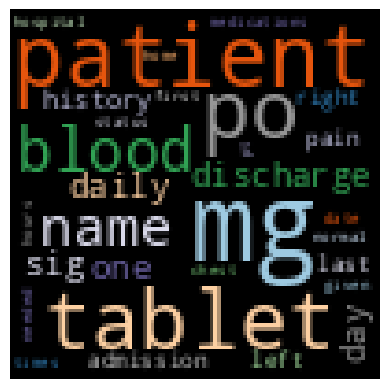

In [ ]:
wc = WordCloud(width=100, height=100, max_words=100, colormap='tab20c').generate_from_frequencies(count)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
#Use the below to normalize or standardize the count based on relative frequencies

In [ ]:
countstd = cnotes ['cleaned_text'].explode().value_counts(normalize=True)

In [ ]:
countstd

cleaned_text
mg                 0.013310
patient            0.011980
po                 0.011180
tablet             0.010847
blood              0.009298
                     ...   
infetion           0.000003
shivering          0.000003
hallway            0.000003
hypersensitivty    0.000003
chloroseptic       0.000003
Name: proportion, Length: 13887, dtype: float64

In [ ]:
#Let's upload the image for the project lifecycle
logo = files.upload()

Saving Week 7-NLP Project Life Cycle.jpg to Week 7-NLP Project Life Cycle.jpg


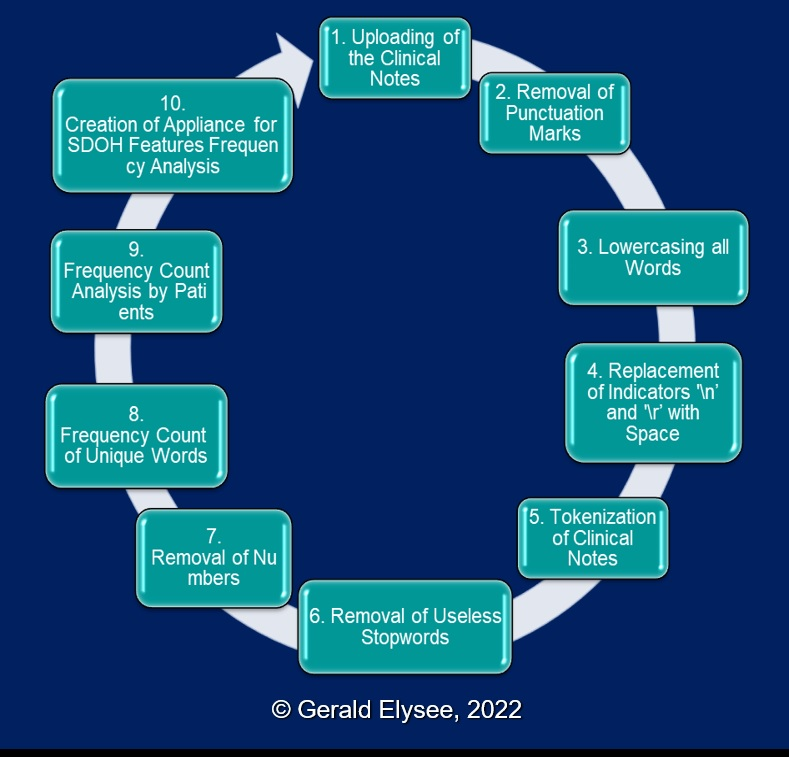

In [ ]:
Image ('Week 7-NLP Project Life Cycle.jpg', width = 800)

9. Frequency Count Analysis by patients using scikit-learn's CountVectorizer

In [ ]:
#Convert the list in cnotes['cleaned_text'] into a string with single quotes around each word, representing
#This will open up a whole host of capabilities that can be used for frequency analysis by Patients

In [ ]:
cnotes['cleaned_text_st']=cnotes['cleaned_text'].apply(str)
cnotes['cleaned_text_st']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Above result shows single quotes around each word, representing string
# Now we perform frequency analysis starting with vectorization approach to find how many times each word is mentioned in the clinical notes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Bag of Words, a text vectorization approach, reflecting the occurrence of each word within clinical note

In [ ]:
nvectors = CountVectorizer()

In [ ]:
vector_matrix = nvectors.fit_transform(cnotes['cleaned_text_st'])

In [ ]:
vector_matrix

<327x13869 sparse matrix of type '<class 'numpy.int64'>'
	with 155355 stored elements in Compressed Sparse Row format>

In [ ]:
#Convert this inadequate matrix into an array

In [ ]:
vector_matrix.toarray() #an array integrates many values from many lists or columns and put them in only a single column

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

10. Creation of appliance for SDOH Features Frequency Analysis with deadly diseases by Patients

In [ ]:
# For better interpretation, let's create an object called countingappliance
# That puts together the vector_matrix and the feature_names
# The countingappliance is like a counting device or instrument used for searching for specific words and counting the number of times the words show up for each patient

In [ ]:
countingappliance = pd.DataFrame(vector_matrix.toarray(), columns=nvectors.get_feature_names_out())
countingappliance

,aa,aaa,aagd,aair,aao,aaox,ab,abacavir,abacavirlamivudine,abatacept,...,zone,zonegran,zones,zoster,zostermva,zosyn,zosynvanco,zydis,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This creates a data frame with columns/features and their counts for each patient
#The results show 13869 columns or features
#It's better to ask countingappliance to look for SDOH or chronic related columns/features you want

In [ ]:
#Run the code below to transpose the display
countingappliance.T.sort_values(by=0, ascending=False).head(50)

,0,1,2,3,4,5,6,7,8,9,...,317,318,319,320,321,322,323,324,325,326
ct,5,0,0,0,17,1,0,6,2,2,...,0,0,3,0,2,0,0,5,0,8
radiologic,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
job,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
date,2,3,4,2,3,4,2,3,3,5,...,2,3,3,3,3,4,3,3,7,3
head,2,2,3,1,3,3,0,6,2,3,...,0,0,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
effect,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
discharge,1,5,6,8,7,7,7,10,8,8,...,6,6,7,6,14,7,10,9,7,16
effusion,1,0,0,3,1,0,1,0,0,0,...,0,0,1,0,0,0,0,9,1,5
sacrum,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Use the counting appliance to search for different words to see how many times they are mentioned for each of the 327 patients

In [ ]:
countingappliance[['coronary', 'stroke', 'pneumonia', 'cancer', 'diabetes', 'alzheimer', 'tuberculosis', 'cirrhosis', 'pneumonia']]

,coronary,stroke,pneumonia,cancer,diabetes,alzheimer,tuberculosis,cirrhosis,pneumonia
0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0
3,1,0,2,0,0,0,0,0,2
4,1,1,3,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...
322,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0
324,0,0,4,3,3,0,0,0,4
325,0,1,2,1,0,0,0,0,2


In [ ]:
#If you get a KeyError "['word1', 'word2']" not in index", just remove those words from the countingappliance and any others that give you an error

In [ ]:
#Run the below codes to import relevant libraries and upload the image for Social Determinants of Health
from IPython.display import Image

In [ ]:
logo = files.upload()

Saving Week 7-Social Determinants of Health.jpg to Week 7-Social Determinants of Health.jpg


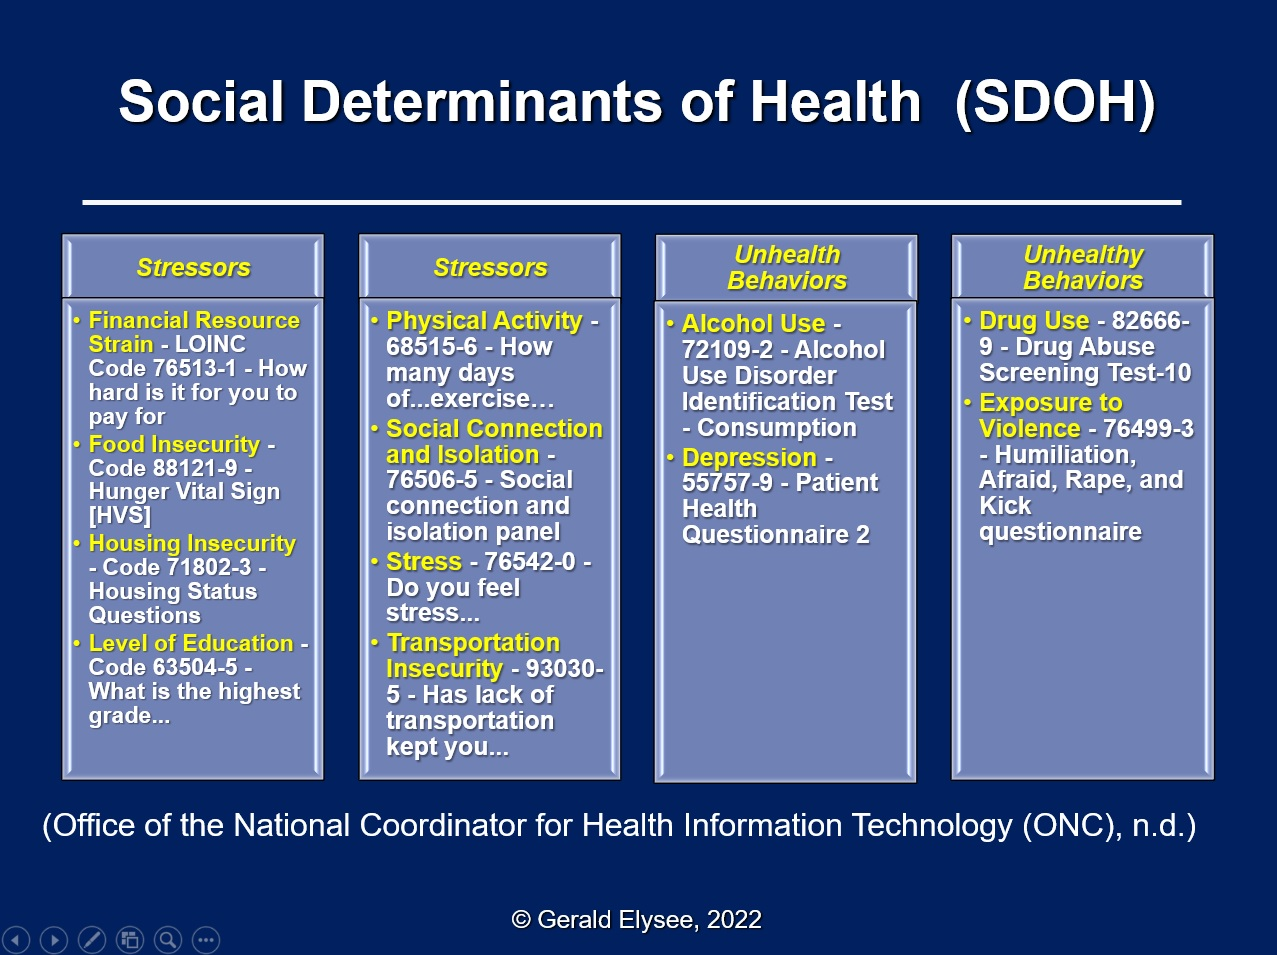

In [ ]:
Image('Week 7-Social Determinants of Health.jpg', width= 1000)

In [ ]:
# Let's add some SDOH features to the countingappliance such as 'housing', 'nutrition', and 'diet' and see if there are any SDOHs in patients' clinical notes
countingappliance[['housing', 'nutrition', 'diet', 'food', 'exercise', 'physical', 'transportation', 'alcohol', 'drug', 'violence', 'depression', 'access', 'coronary', 'stroke', 'pneumonia', 'pulmonary', 'cancer', 'diabetes', 'alzheimer', 'tuberculosis', 'cirrhosis']]

,housing,nutrition,diet,food,exercise,physical,transportation,alcohol,drug,violence,...,access,coronary,stroke,pneumonia,pulmonary,cancer,diabetes,alzheimer,tuberculosis,cirrhosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,4,0,1,0,0,...,0,0,0,2,4,0,0,0,0,0
2,0,1,1,0,0,2,0,0,0,0,...,2,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,2,0,0,0,0,...,1,1,0,2,5,0,0,0,0,0
4,0,1,0,0,0,2,0,0,0,0,...,0,1,1,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,3,0,0,0,0,0
323,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,0,1,0,0,1,0,0,0,0,...,1,0,0,4,2,3,3,0,0,0
325,0,0,0,0,0,1,0,0,1,0,...,0,0,1,2,4,1,0,0,0,0


In [ ]:
# Run the code below to display all 327 rows of data to see all patients
pd.set_option('display.max_rows', None)

In [ ]:
# Run the counting appliance again with SDOH words to see all of the patients
#If you get a KeyError "['word1', 'word2']" not in index", just remove those words from the countingappliance and any others that give you an error

In [ ]:
countingappliance[['housing', 'nutrition', 'diet', 'food', 'exercise', 'physical', 'transportation', 'alcohol', 'drug', 'violence', 'depression', 'access', 'coronary', 'stroke', 'pneumonia', 'pulmonary', 'cancer', 'diabetes', 'alzheimer', 'tuberculosis', 'cirrhosis']]

,housing,nutrition,diet,food,exercise,physical,transportation,alcohol,drug,violence,...,access,coronary,stroke,pneumonia,pulmonary,cancer,diabetes,alzheimer,tuberculosis,cirrhosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,4,0,1,0,0,...,0,0,0,2,4,0,0,0,0,0
2,0,1,1,0,0,2,0,0,0,0,...,2,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,2,0,0,0,0,...,1,1,0,2,5,0,0,0,0,0
4,0,1,0,0,0,2,0,0,0,0,...,0,1,1,3,1,0,0,0,0,0
5,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,3,2,0,0,0,0,0
7,0,0,0,0,1,2,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0
8,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Remember, this is only a subset of the original NOTEEVENTS.csv datasets
#For a complete project, we should use the full dataset, and then the above can be combined with other datasets that have the dependent variable which can build predictive models
#Machine Leanring algorithms can be used to create models to predict readmissions and other patient outcomes for patients that have a combo of those words in their clinical notes